## Breve explicación de la elección del dataset: características, número de atributos y  variables, área al que pertenecen los datos. 

Realizado por Kevin Steban Rodriguez y Katalina Morales Dueñas

13 de Octubre del 2022

La base de datos a utilizar será acerca de los pagos por defecto de los clientes en Taiwán de su tarjeta de crédito donde se busca ver su probabilidad de incumplimiento e identificar clientes creíbles y no creíbles, todo esto bajo el panorama de la crisis de creditos de Taiwan del 2005. “incumplimiento de los clientes de tarjetas de crédito” o su nombre en inglés: “default of credit card clients Data Set” cuenta con 24 atributos, 30,000 instancias y pertenece al área de negocios.

Se encuentra un histórico de registros desde abril hasta septiembre del 2005. Y solamente se concluyó tomar el mes de septiembre, por ende, se puede decir que esta base de datos filtrada tiene 10 variables categóricas y 14 numéricas.

La base cuenta con datos faltantes y malas digitaciones. Con el fin de un analisis mas llevadero, se usa el esquema de "Datos disponibles" removiendo estos mismos.

### Variables cualitativas: 

- SEX: Género (1 = masculino; 2 = femenino).
- EDUCATION: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
- MARRIAGE: Estado civil (1 = casado; 2 = soltero; 3 = otros).
- PAY_0-PAY_6: Pago mensual de septiembre-abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

**Inconsistencias** 

 -2 corresponde a que no hay crédito para pagar; y
0 corresponde a un pago realizado a tiempo pero no el monto total para liquidar el saldo. (Otra forma de pensar en esto es que se cumple el pago mínimo).
-2: Sin consumo; -1: Pagado en su totalidad; 0: El uso de crédito revolvente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más. 

- DEFAULT PAYMENT NEXT MONTH: 1 hay un incumplimiento de pago para octubre de 2005. 0 quiere decir que no está incumpliendo.


### Variables cuantitativas:

- AGE: Edad (años).
- LIMIT_BAL: Monto del crédito otorgado (Nuevo dólar taiwanés): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
- BILL_AMT1-BILL_AMT6: Importe del estado de cuenta (Nuevo dólar taiwanés). Monto del estado de cuenta en septiembre-abril de 2005.

**Inconsistencias**

Por lo general, es posible que un cliente de tarjeta de crédito pague en exceso su factura y tenga temporalmente un saldo negativo. Por ejemplo, supongamos que mi factura de este mes es de 100 pero pago 250. Suponiendo que no tengo otras compras recientes, mi saldo será de -150.

En cuanto a por qué un cliente podría hacer esto, tal vez su pago automático esté configurado para pagar la misma cantidad todos los meses, independientemente del saldo, tal vez se olvidó si pagó su factura un mes y accidentalmente pagó dos veces, o tal vez simplemente le gusta pagar algo compras futuras esperadas por adelantado. Es posible que este tipo de comportamiento de pago no siempre parezca racional, pero no es poco común.

- PAY_AMT1-PAY_AMT6: Monto del pago anterior (Nuevo dólar taiwanés). Monto pagado en septiembre-abril de 2005


## Escenario mineria de datos

El fin de la base es el poder seleccionar individuos para saber si es viable entregarles entergarles una tarjeta de credito con un "cupo" alto. Para ello, se desea entrenar a la IA es un ambiente supervisado para obetenr los resultados mas optimos. Los creadores originales de la base recomendaban redes neuronales para la realización de este fin, pero una tarea de Clasificación sencilla tambien es viable dentro de este contexto.

## Importar datos y librerias

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install xlrd==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [5]:
df = pd.read_excel(r"/content/tarjeta_credito.xls", 
                   dtype={
                     'SEX': str, 
                     'PAY_0': str,
                     'PAY_2': str,
                     'PAY_3': str,
                     'PAY_4': str,
                     'PAY_5': str,
                     'PAY_6': str,
                     'default payment next month': str
                 })

In [6]:
df = df.drop(['ID'], axis = 1)

In [7]:
df=df.query('EDUCATION != [0,5,6] & MARRIAGE != [0] & BILL_AMT1 >= 0')

In [8]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


Dimensión de los datos

In [9]:
print('Incumplimientos de pago en tarjetas de crédito')
print('Filas: ', df.shape[0])
print('Columnas: ', df.shape[1])

Incumplimientos de pago en tarjetas de crédito
Filas:  29013
Columnas:  24


Atributo y tipo de atributo

In [10]:
df['EDUCATION'] = df['EDUCATION'].astype('object')
df['MARRIAGE'] = df['MARRIAGE'].astype('object')

In [11]:
df.dtypes

LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                            int64
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

## Análisis de datos faltantes

In [12]:
for col in df.columns:
    num_missing = df[col].isnull().sum()
    pct_missing = np.mean(df[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

LIMIT_BAL - 0.0% - 0
SEX - 0.0% - 0
EDUCATION - 0.0% - 0
MARRIAGE - 0.0% - 0
AGE - 0.0% - 0
PAY_0 - 0.0% - 0
PAY_2 - 0.0% - 0
PAY_3 - 0.0% - 0
PAY_4 - 0.0% - 0
PAY_5 - 0.0% - 0
PAY_6 - 0.0% - 0
BILL_AMT1 - 0.0% - 0
BILL_AMT2 - 0.0% - 0
BILL_AMT3 - 0.0% - 0
BILL_AMT4 - 0.0% - 0
BILL_AMT5 - 0.0% - 0
BILL_AMT6 - 0.0% - 0
PAY_AMT1 - 0.0% - 0
PAY_AMT2 - 0.0% - 0
PAY_AMT3 - 0.0% - 0
PAY_AMT4 - 0.0% - 0
PAY_AMT5 - 0.0% - 0
PAY_AMT6 - 0.0% - 0
default payment next month - 0.0% - 0


No hay presencia de datos faltantes en ninguna de las variables.

## Datos duplicados

In [13]:
df[df.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1980,150000,2,1,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4585,150000,2,1,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6022,210000,2,1,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6466,210000,2,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7319,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
8320,360000,1,2,1,41,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
10250,50000,1,2,2,26,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
13106,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
14294,20000,1,2,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,1
15458,160000,1,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_dedupped = df.drop_duplicates()
print(df.shape)
print(df_dedupped.shape)

(29013, 24)
(28978, 24)


In [15]:
df_dedupped.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Consistencia de datos

Variables categóricas:

In [16]:
df_dedupped.dtypes

LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                            int64
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [17]:
df_dedupped['SEX'].value_counts()

2    17477
1    11501
Name: SEX, dtype: int64

In [18]:
df_dedupped['EDUCATION'].value_counts()

2    13798
1    10275
3     4789
4      116
Name: EDUCATION, dtype: int64

In [19]:
df_dedupped['MARRIAGE'].value_counts()

2    15486
1    13179
3      313
Name: MARRIAGE, dtype: int64

No aparece en el diccionario que significa el valor 0 ni -2. Esto fue aclarado en la sección de inconsistencias la cual se encuentra en la descripción inicial de la base.

In [20]:
df_dedupped['PAY_0'].value_counts() 

0     14499
-1     5625
1      3264
2      2639
-2     2492
3       320
4        76
5        24
8        19
6        11
7         9
Name: PAY_0, dtype: int64

In [21]:
df_dedupped['PAY_2'].value_counts()

0     15476
-1     5787
2      3903
-2     3304
3       325
4        97
1        28
5        25
7        20
6        12
8         1
Name: PAY_2, dtype: int64

In [22]:
df_dedupped['PAY_3'].value_counts()

0     15478
-1     5651
2      3765
-2     3695
3       236
4        75
7        27
6        23
5        21
1         4
8         3
Name: PAY_3, dtype: int64

In [23]:
df_dedupped['PAY_4'].value_counts()

0     16115
-1     5412
-2     3986
2      3116
3       179
4        68
7        58
5        35
6         5
1         2
8         2
Name: PAY_4, dtype: int64

In [24]:
df_dedupped['PAY_5'].value_counts()

0     16556
-1     5299
-2     4185
2      2599
3       176
4        83
7        58
5        17
6         4
8         1
Name: PAY_5, dtype: int64

In [25]:
df_dedupped['PAY_6'].value_counts()

0     15924
-1     5490
-2     4515
2      2739
3       182
4        48
7        46
6        19
5        13
8         2
Name: PAY_6, dtype: int64

In [26]:
df_dedupped['default payment next month'].value_counts()


0    22488
1     6490
Name: default payment next month, dtype: int64

Variables cuantitativas:

In [27]:
df_dedupped['LIMIT_BAL'].describe()

count      28978.000000
mean      166466.411761
std       129809.238372
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [28]:
df_dedupped['AGE'].describe()

count    28978.000000
mean        35.443543
std          9.216877
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [29]:
#Dinero que deben desde abril hasta septiembre del 2005:

In [30]:
df_dedupped['BILL_AMT1'].describe()

count     28978.000000
mean      52076.273621
std       73740.369257
min           0.000000
25%        4236.500000
50%       23741.500000
75%       68250.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

De acuerdo a la variable BILL_AMT se presentan valores negativos en los montos que deben esto está aclarado en la sección de inconsistencias en la parte inicial en la descripción de la base.

In [31]:
df_dedupped['BILL_AMT2'].describe() 

count     28978.000000
mean      49853.684105
std       71311.645079
min      -69777.000000
25%        3469.000000
50%       22300.500000
75%       65067.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64

In [32]:
df_dedupped['BILL_AMT3'].describe() #Mas pasa el tiempo más deben

count    2.897800e+04
mean     4.760700e+04
std      6.946401e+04
min     -1.572640e+05
25%      3.125250e+03
50%      2.071800e+04
75%      6.110925e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64

In [33]:
df_dedupped['BILL_AMT4'].describe()

count     28978.000000
mean      43851.809062
std       64547.161262
min     -170000.000000
25%        2589.000000
50%       19407.500000
75%       55627.250000
max      891586.000000
Name: BILL_AMT4, dtype: float64

In [34]:
df_dedupped['BILL_AMT5'].describe()

count     28978.000000
mean      40894.253227
std       61022.037811
min      -81334.000000
25%        2026.000000
50%       18524.500000
75%       50776.250000
max      927171.000000
Name: BILL_AMT5, dtype: float64

In [35]:
df_dedupped['BILL_AMT6'].describe()                                 

count     28978.000000
mean      39493.847160
std       59842.995365
min     -339603.000000
25%        1450.000000
50%       17670.000000
75%       49735.750000
max      961664.000000
Name: BILL_AMT6, dtype: float64

In [36]:
#Dinero que ya se pagó

In [37]:
df_dedupped[['PAY_AMT1','PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,28978.000000,2.897800e+04,28978.000000,28978.000000,28978.000000,28978.000000
mean,5592.748326,5.857845e+03,5210.288460,4837.219097,4805.112637,5213.798364
std,16105.550809,2.288608e+04,17611.263646,15694.812867,15170.625750,17767.782330
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,9.785000e+02,419.000000,316.000000,300.000000,184.250000
50%,2135.000000,2.022500e+03,1842.000000,1500.000000,1526.500000,1500.000000
75%,5009.000000,5.000000e+03,4531.750000,4056.000000,4095.000000,4006.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


## Selección variables explicativas

- Selección de la variable a clasificar: Dummy (1 y 0) DEFAULT PAYMENT NEXT MONTH: 1 hay un incumplimiento de pago para octubre de 2005 0 quiere decir que no está incumpliendo.

- Selección de las variables independientes: ¿Qué podría explicar o que nos ayudaría a clasificar que un individuo sea incumplido o no con el pago?

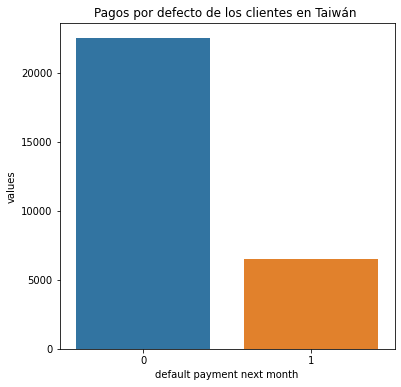

In [ ]:
temp = df_dedupped['default payment next month'].value_counts()
df = pd.DataFrame({'default payment next month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Pagos por defecto de los clientes en Taiwán ')
sns.set_color_codes("pastel")
sns.barplot(x = 'default payment next month', y= "values", data=df)
locs, labels = plt.xticks()
plt.show()

Si el valor es 1 hay un incumplimiento de pago para el siguiente mes. (Octubre 2005) En su mayoria son más aquellos que cumplen que los que incumplen.

Variables cuantitativas:

In [ ]:
df1 = df.iloc[:, [0,4,11,12,13,14,15,16,17,18,19,20,21,22]] ; df1

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,34,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [ ]:
corr_df = df1.corr()
print("Matriz de correlación:")
print(corr_df, "\n")

Matriz de correlación:
           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.142188   0.294221   0.286080   0.290139   0.301721   
AGE         0.142188  1.000000   0.057293   0.054636   0.053834   0.052069   
BILL_AMT1   0.294221  0.057293   1.000000   0.952805   0.894352   0.862773   
BILL_AMT2   0.286080  0.054636   0.952805   1.000000   0.928546   0.894537   
BILL_AMT3   0.290139  0.053834   0.894352   0.928546   1.000000   0.925894   
BILL_AMT4   0.301721  0.052069   0.862773   0.894537   0.925894   1.000000   
BILL_AMT5   0.303291  0.050368   0.833102   0.862647   0.886434   0.940979   
BILL_AMT6   0.297412  0.048851   0.806297   0.834842   0.856597   0.902698   
PAY_AMT1    0.204436  0.026229   0.153187   0.281958   0.243899   0.237988   
PAY_AMT2    0.179656  0.021987   0.103528   0.102947   0.317221   0.208741   
PAY_AMT3    0.212445  0.029746   0.158843   0.152703   0.132312   0.299704   
PAY_AMT4    0.205991  0.020446   0.160267

Correlación de características

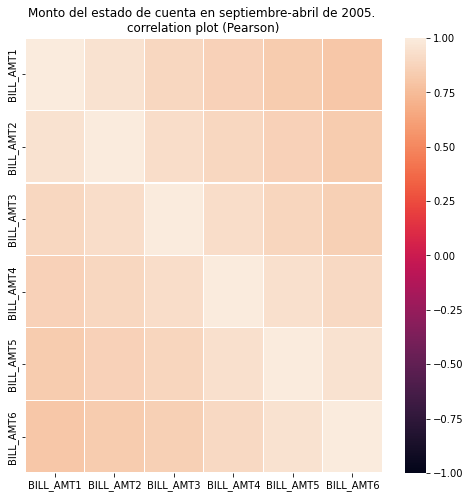

In [ ]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Monto del estado de cuenta en septiembre-abril de 2005. \ncorrelation plot (Pearson)')
corr = df_dedupped[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

La correlación está disminuyendo con la distancia entre los meses. Las correlaciones más bajas son entre septiembre y abril.

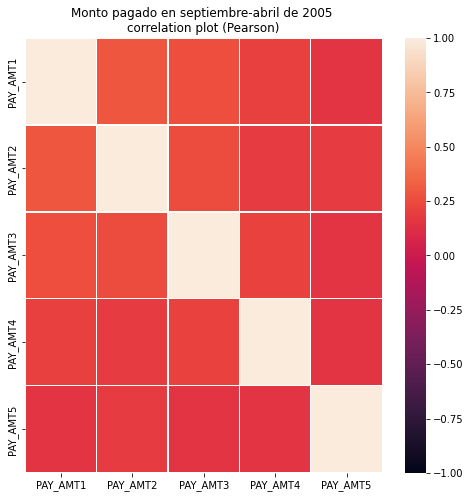

In [ ]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Monto pagado en septiembre-abril de 2005 \ncorrelation plot (Pearson)')
corr = df_dedupped[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

No existen correlaciones significativas entre los montos de los pagos anteriores de abril a septiembre de 2005.

Variables cualitativas:

In [ ]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df_dedupped, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

Estado civil vs la edad de acuerdo al sexo

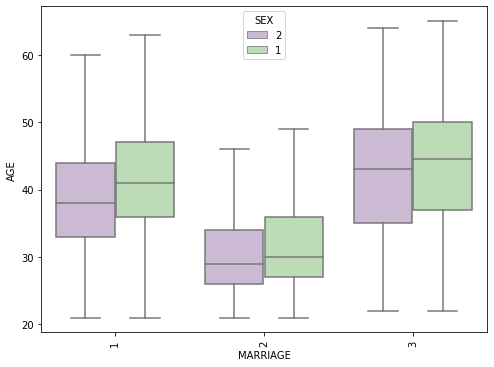

In [ ]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

Nivel educativo vs la edad de acuerdo al estado civil

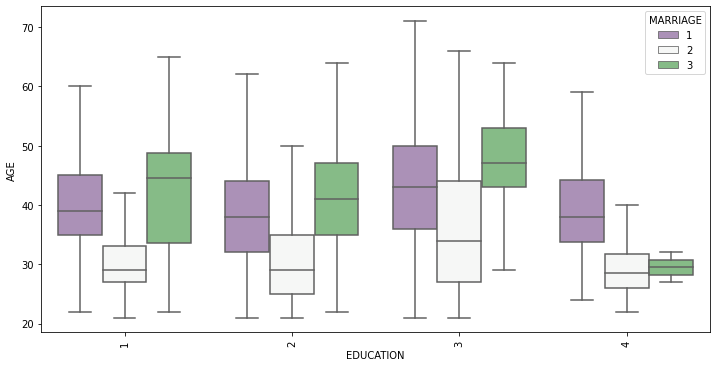

In [ ]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

Estado civil vs el monto otorgado de acuerdo al nivel educativo

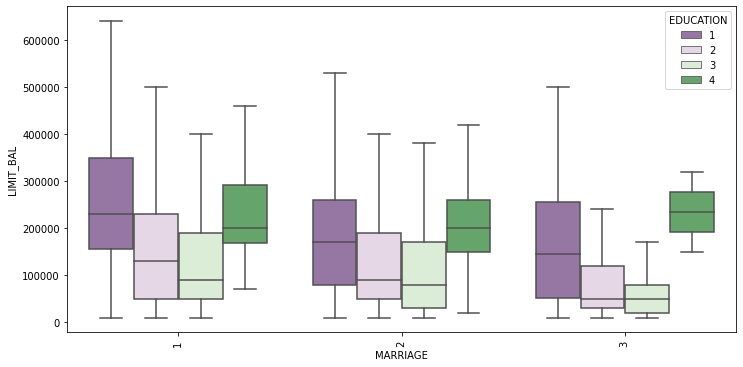

In [ ]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

Credito vs Sexo

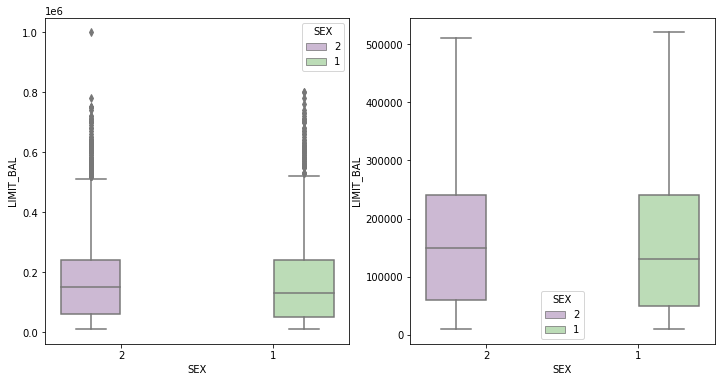

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df_dedupped, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df_dedupped, palette="PRGn",showfliers=False)
plt.show();

Con la variable respuesta

Crédito otorgado:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['SEX'], columns = df_dedupped['default payment next month'])

In [ ]:
OBS

default payment next month,0,1
SEX,,
1,8686,2815
2,13802,3675


In [ ]:
from scipy.stats import chi2_contingency 

H0: Establece que no existe relación entre las variables. 

Ha: Existe una relación significativa entre los dos.

In [ ]:
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 6.2086433674366054e-12
Dependent(reject H0)


Existe una relación significativa entre el sexo y el incumplimiento o cumplimiento del pago. Por lo tanto esta variable es seleccionada para el modelo de clasificación.

In [ ]:
OBS = pd.crosstab(index = df_dedupped['EDUCATION'], columns = df_dedupped['default payment next month']); OBS

In [ ]:
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 1.9684030683130793e-25
Dependent(reject H0)


Existe una relación significativa entre el nivel educativo y el incumplimiento o cumplimiento del pago. Por lo tanto esta variable es seleccionada para el modelo de clasificación.

In [ ]:
OBS = pd.crosstab(index = df_dedupped['MARRIAGE'], columns = df_dedupped['default payment next month']); OBS

default payment next month,0,1
MARRIAGE,,
1,10050,3129
2,12208,3278
3,230,83


In [ ]:
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 2.698996910087648e-07
Dependent(reject H0)


Existe una relación significativa entre el estado civil y el incumplimiento o cumplimiento del pago. Por lo tanto esta variable es seleccionada para el modelo de clasificación.

Pago mensual de septiembre-abril de 2005

Pago abril:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_0'], columns = df_dedupped['default payment next month']); OBS

default payment next month,0,1
PAY_0,,
-1,4673,952
-2,2163,329
0,12631,1868
1,2092,1172
2,803,1836
3,76,244
4,24,52
5,11,13
6,5,6


In [ ]:
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Mayo:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_2'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Junio:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_3'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Julio:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_4'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Agosto:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_5'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Pago Septiembre:

In [ ]:
OBS = pd.crosstab(index = df_dedupped['PAY_6'], columns = df_dedupped['default payment next month']); OBS
stat, p, dof, expected = chi2_contingency(OBS) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 0.0
Dependent(reject H0)


Existe una relación significativa entre los pagos mensuales del monto y el incumplimiento o cumplimiento del pago. Por lo tanto esta variable es seleccionada para el modelo de clasificación.

Variables cuantitativas:

In [ ]:
def boxplot_variation(feature1, feature2, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2,
                data=df_dedupped, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

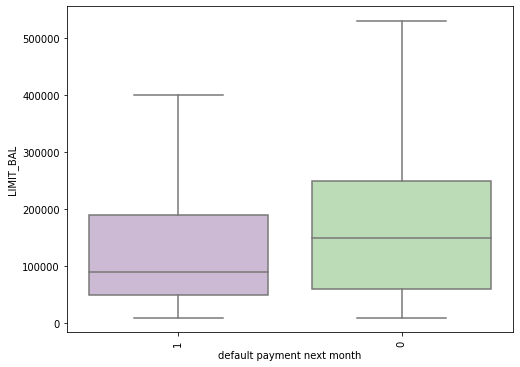

In [ ]:
boxplot_variation('default payment next month', 'LIMIT_BAL',8)

Aquellos individuos registrados con montos asignados "Bajos" son quienes cumplen con el pago del siguiente mes de octubre mientrás que, aquellos que tienen montos elevados no han cumplido con sus pagos al ser tan altos.

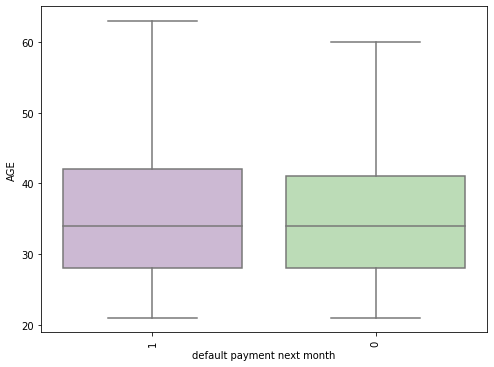

In [ ]:
boxplot_variation('default payment next month', 'AGE',8)

No parece existir una diferencia del incumplimiento por la edad del individuo.

Monto del estado de cuenta:

Text(0.5, 1.0, 'Septiembre')

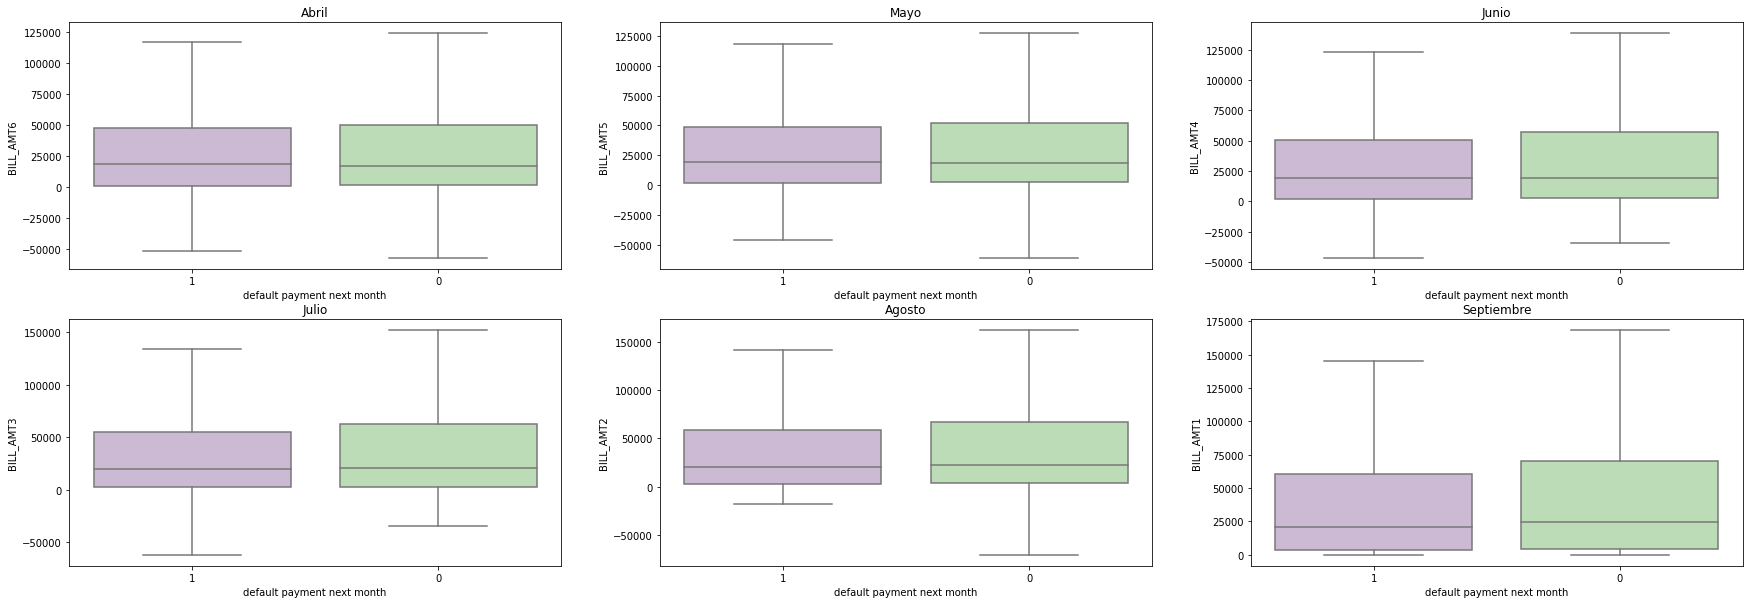

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT6", ax=axes[0,0], showfliers=False, palette="PRGn")
axes[0,0].set_title("Abril")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT5",  ax=axes[0,1], showfliers=False, palette="PRGn")
axes[0,1].set_title("Mayo")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT4",  ax=axes[0,2], showfliers=False, palette="PRGn")
axes[0,2].set_title("Junio")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT3",  ax=axes[1,0], showfliers=False, palette="PRGn")
axes[1,0].set_title("Julio")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT2",  ax=axes[1,1], showfliers=False, palette="PRGn")
axes[1,1].set_title("Agosto")
sns.boxplot(data=df_dedupped, x="default payment next month", y="BILL_AMT1",  ax=axes[1,2], showfliers=False, palette="PRGn")
axes[1,2].set_title("Septiembre")

Se puede evidenciar como en los primeros dos meses no se ven diferencias entre ambos boxplot (Cumplimiento e incumplimiento) lo que quiere decir que el monto del estado de cuenta no presenta cambios significativos en que la persona tenga o no un incumplimiento. Sin embargo a partir del mes de junio se puede notar que aquellos que no incumplen tienen montos del estado de cuenta más grandes a comparacion de quienes si incumplen.
A medida que pasa el tiempo se evidencia como el monto del estado de cuenta disminuyó en cuanto a su valor.

Monto del pago anterior:

Text(0.5, 1.0, 'Septiembre')

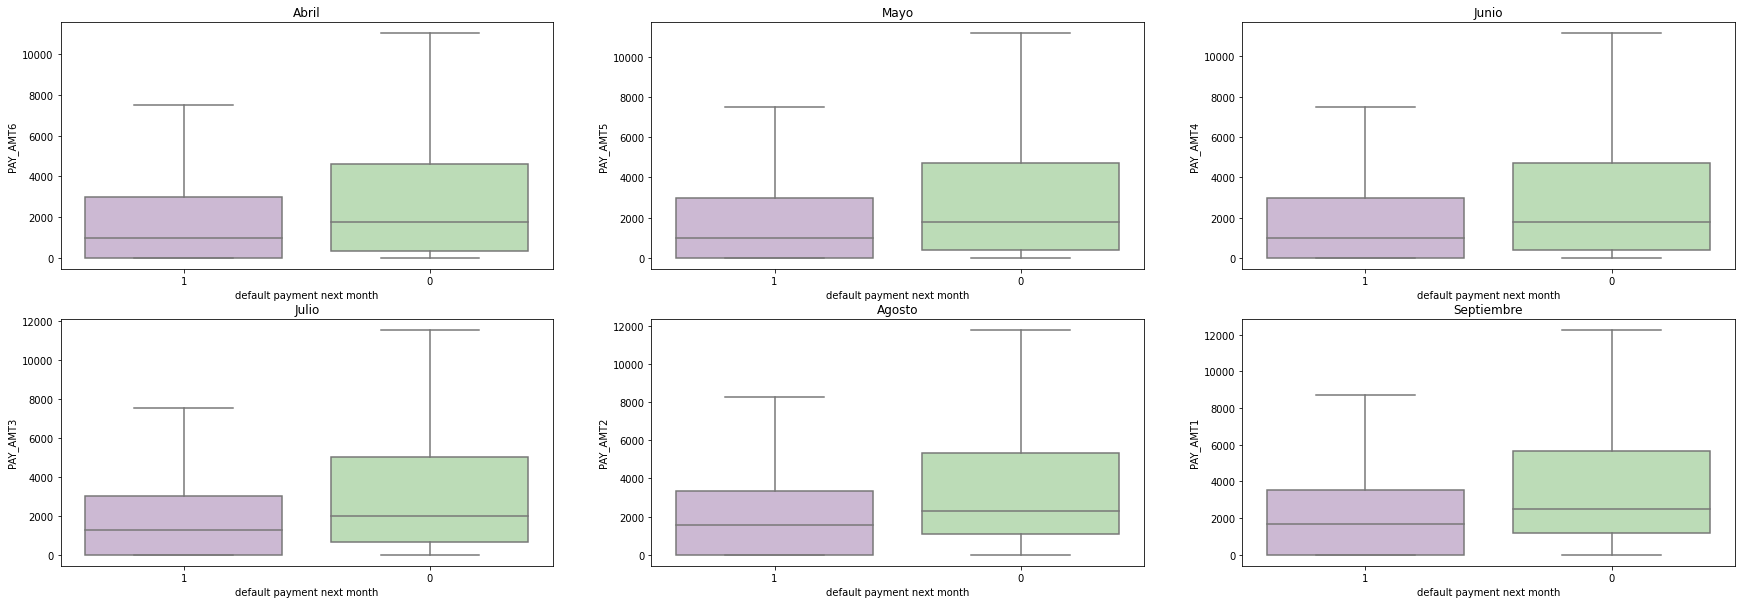

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT6", ax=axes[0,0], showfliers=False, palette="PRGn")
axes[0,0].set_title("Abril")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT5",  ax=axes[0,1], showfliers=False, palette="PRGn")
axes[0,1].set_title("Mayo")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT4",  ax=axes[0,2], showfliers=False, palette="PRGn")
axes[0,2].set_title("Junio")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT3",  ax=axes[1,0], showfliers=False, palette="PRGn")
axes[1,0].set_title("Julio")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT2",  ax=axes[1,1], showfliers=False, palette="PRGn")
axes[1,1].set_title("Agosto")
sns.boxplot(data=df_dedupped, x="default payment next month", y="PAY_AMT1",  ax=axes[1,2], showfliers=False, palette="PRGn")
axes[1,2].set_title("Septiembre")

En cuanto al monto pagado en septiembre-abril de 2005 durante estos seis meses si se evidencia un cambio grande entre aquellos que si incumplen y los que no, lo cual la hace importante para ser seleccionada en el modelo. Aquellos que incumplen en sus pagos tienen un menor monto pagado a comparacion de quienes si cumplen.

Pruebas estadisticas finales:

Las hipótesis contrastadas por el t-test de muestras independientes son:

H0 : no hay diferencias entre las medias:  μx=μy 

Ha : sí hay diferencias entre las medias:  μx≠μy

Monto otorgado:

In [ ]:
#Definir 
from scipy.stats import ttest_ind
group1 = df_dedupped[df_dedupped['default payment next month']=="1"]
group2 = df_dedupped[df_dedupped['default payment next month']=="0"] 

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['LIMIT_BAL'])

Ttest_indResult(statistic=-27.033063864563864, pvalue=5.683894607893437e-159)

Dado que el valor p es inferior a 0.05, rechazamos la hipótesis nula de la prueba t y concluimos que hay suficiente evidencia para decir que las personas que incumplen tienen en promedio un monto otorgado diferente a los que si cumplen.

Edad:

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['AGE'])

Ttest_indResult(statistic=168.4091688366584, pvalue=0.0)

Aunque en el Boxplot se evidencian similitudes segun la prueba T realizada se dice que si hay diferencias significativas entre si una persona incumple o no con respecto a su edad.

Monto del estado de cuenta:

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT6']) 

Ttest_indResult(statistic=83.48411572569468, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT5']) 

Ttest_indResult(statistic=81.49556384451544, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT4']) 

Ttest_indResult(statistic=76.28912118883076, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT3']) 

Ttest_indResult(statistic=69.76046831706618, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT2']) 

Ttest_indResult(statistic=66.9704169967604, pvalue=0.0)

In [ ]:
ttest_ind(group1['LIMIT_BAL'], group2['BILL_AMT1']) 

Ttest_indResult(statistic=63.52805514009813, pvalue=0.0)

De acuerdo a las prueba T se puede decir que el promedio del monto del estado de cuenta es estadisticamente diferente en las personas que incumplen a comparación de aquellas que cumplen. Quienes cumplen con su pago el monto del estado de cuenta es menor.


En conclusión, todas las variables resultan ser determinantes en el modelo para poder clasificar si una persona incumplirá o no en su pago. La única que resulta no ser tan importante como las demás es la variable "Edad" 

## Algoritmo de clasificación 

Para las métricas se hará uso de la precisión y el Log Loss/Binary Crossentropy

Aplique el algoritmo realizando un modelo utilizando todo el dataset preprocesado, prediga todos
los valores del conjunto y evalúe con las métricas correspondientes al tipo de aprendizaje
supervisado. Implemente un proceso iterativo para al menos dos hiperparámetros del algoritmo

In [38]:
y = df_dedupped.loc[:,["default payment next month"]];y

,default payment next month
0,1
1,1
2,0
3,0
4,0
...,...
29994,1
29995,0
29996,0
29997,1


In [39]:
df_dummy = pd.get_dummies(df_dedupped[["SEX", "EDUCATION","MARRIAGE", 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]); df_dummy

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,...,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
29995,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29996,1,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
 #Cualitativas
df2 = df_dummy.drop(['SEX_1', 'EDUCATION_1', 'MARRIAGE_1','PAY_0_-1', 'PAY_2_-1','PAY_3_-1','PAY_4_-1','PAY_5_-1','PAY_6_-1' ], axis=1); df2

,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
29995,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
29996,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29997,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
df2 = df2.reset_index()

In [42]:
df1 = df_dedupped.loc[:,['LIMIT_BAL', 'AGE', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]; df1 #Cuantitativas

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,34,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [43]:
# standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_x = df1.astype(float)
scaler.fit(X_x)
df1_scaled = scaler.transform(X_x)

In [44]:
df11 = pd.DataFrame(df1_scaled)
df11.columns =["LIMIT_BAL",	"AGE",	"BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",
               "BILL_AMT5",	"BILL_AMT6",	"PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6"] 

In [45]:
df11

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.128340,-1.241607,-0.653158,-0.655608,-0.675441,-0.679388,-0.670167,-0.659969,-0.347262,-0.225855,-0.295855,-0.308210,-0.316743,-0.293446
1,-0.357965,-1.024610,-0.669852,-0.674918,-0.646749,-0.628695,-0.613547,-0.605476,-0.347262,-0.212266,-0.239072,-0.244494,-0.316743,-0.180881
2,-0.589078,-0.156622,-0.309704,-0.502405,-0.490162,-0.457360,-0.425202,-0.400135,-0.253007,-0.190418,-0.239072,-0.244494,-0.250825,-0.012033
3,-0.897228,0.168873,-0.068977,-0.022727,0.024243,-0.240724,-0.195593,-0.166219,-0.223079,-0.167740,-0.227715,-0.238122,-0.246277,-0.237164
4,-0.897228,2.338843,-0.589365,-0.619597,-0.169472,-0.354968,-0.356406,-0.340277,-0.223079,1.346831,0.271973,0.265237,-0.271326,-0.255230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28973,-0.666115,-0.156622,0.277746,0.390607,0.457468,0.521600,0.683580,0.696236,0.087378,-0.103027,-0.295855,0.137805,-0.316743,-0.068316
28974,0.412409,0.385870,1.856162,2.004775,2.314303,0.684042,-0.158261,-0.392932,0.180516,0.617948,-0.011770,-0.114066,0.012847,-0.237164
28975,-0.126853,0.819864,-0.683400,-0.673474,-0.634944,-0.540278,-0.585114,-0.659969,-0.233200,-0.101891,0.215077,-0.299991,-0.316743,-0.293446
28976,-1.051302,0.168873,-0.657877,-0.652046,-0.645655,-0.355929,-0.332873,-0.336500,-0.347262,-0.255961,0.953367,-0.040601,-0.184907,-0.118970


In [46]:
X = pd.concat([df11,df2], axis = 1); X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.128340,-1.241607,-0.653158,-0.655608,-0.675441,-0.679388,-0.670167,-0.659969,-0.347262,-0.225855,...,0,1,0,0,0,0,0,0,0,0
1,-0.357965,-1.024610,-0.669852,-0.674918,-0.646749,-0.628695,-0.613547,-0.605476,-0.347262,-0.212266,...,0,0,0,1,0,0,0,0,0,0
2,-0.589078,-0.156622,-0.309704,-0.502405,-0.490162,-0.457360,-0.425202,-0.400135,-0.253007,-0.190418,...,0,0,1,0,0,0,0,0,0,0
3,-0.897228,0.168873,-0.068977,-0.022727,0.024243,-0.240724,-0.195593,-0.166219,-0.223079,-0.167740,...,0,0,1,0,0,0,0,0,0,0
4,-0.897228,2.338843,-0.589365,-0.619597,-0.169472,-0.354968,-0.356406,-0.340277,-0.223079,1.346831,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28973,-0.666115,-0.156622,0.277746,0.390607,0.457468,0.521600,0.683580,0.696236,0.087378,-0.103027,...,0,0,0,1,0,0,0,0,0,0
28974,0.412409,0.385870,1.856162,2.004775,2.314303,0.684042,-0.158261,-0.392932,0.180516,0.617948,...,0,0,1,0,0,0,0,0,0,0
28975,-0.126853,0.819864,-0.683400,-0.673474,-0.634944,-0.540278,-0.585114,-0.659969,-0.233200,-0.101891,...,0,0,1,0,0,0,0,0,0,0
28976,-1.051302,0.168873,-0.657877,-0.652046,-0.645655,-0.355929,-0.332873,-0.336500,-0.347262,-0.255961,...,0,0,1,0,0,0,0,0,0,0


In [47]:
X = X.drop(['index'], axis=1); X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.128340,-1.241607,-0.653158,-0.655608,-0.675441,-0.679388,-0.670167,-0.659969,-0.347262,-0.225855,...,0,1,0,0,0,0,0,0,0,0
1,-0.357965,-1.024610,-0.669852,-0.674918,-0.646749,-0.628695,-0.613547,-0.605476,-0.347262,-0.212266,...,0,0,0,1,0,0,0,0,0,0
2,-0.589078,-0.156622,-0.309704,-0.502405,-0.490162,-0.457360,-0.425202,-0.400135,-0.253007,-0.190418,...,0,0,1,0,0,0,0,0,0,0
3,-0.897228,0.168873,-0.068977,-0.022727,0.024243,-0.240724,-0.195593,-0.166219,-0.223079,-0.167740,...,0,0,1,0,0,0,0,0,0,0
4,-0.897228,2.338843,-0.589365,-0.619597,-0.169472,-0.354968,-0.356406,-0.340277,-0.223079,1.346831,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28973,-0.666115,-0.156622,0.277746,0.390607,0.457468,0.521600,0.683580,0.696236,0.087378,-0.103027,...,0,0,0,1,0,0,0,0,0,0
28974,0.412409,0.385870,1.856162,2.004775,2.314303,0.684042,-0.158261,-0.392932,0.180516,0.617948,...,0,0,1,0,0,0,0,0,0,0
28975,-0.126853,0.819864,-0.683400,-0.673474,-0.634944,-0.540278,-0.585114,-0.659969,-0.233200,-0.101891,...,0,0,1,0,0,0,0,0,0,0
28976,-1.051302,0.168873,-0.657877,-0.652046,-0.645655,-0.355929,-0.332873,-0.336500,-0.347262,-0.255961,...,0,0,1,0,0,0,0,0,0,0


In [48]:
X.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
       'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
     

In [49]:
#Modelo logistico simple
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9,solver='liblinear',multi_class='auto')
logreg.fit(X, y)
df_dedupped['Churn_pred'] = logreg.predict(X)
df_dedupped.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Churn_pred
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,0
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


In [57]:
pred = pd.DataFrame(logreg.predict(X))

In [58]:
#Predicciones
print(sum(pred[0] == "0"))
print(sum(pred[0] == "1"))

25508
3470


In [50]:
# examine the coefficients
print(logreg.coef_)

[[-2.53069310e-01  2.73373715e-02 -1.17742320e-01  1.65483173e-01
   1.65124259e-01  6.93373941e-03  1.01053334e-02 -5.85767175e-02
  -2.01143500e-01 -2.29895736e-01 -1.79987672e-02 -2.24152664e-02
  -4.04650973e-02 -5.03542183e-02 -1.53348651e-01  2.83032025e-02
  -1.28660030e-02 -1.00267321e+00 -1.51010597e-01  9.01979619e-02
  -5.23188900e-01 -7.37777669e-01  3.49227320e-01  1.55867148e+00
   1.60136199e+00  1.26116411e+00  1.07970082e+00 -9.84901635e-02
   1.12446443e+00 -4.89324230e+00  2.04019842e-01  1.94867836e-01
  -5.21594672e-01  1.79914860e-01  1.78756491e-01 -6.05740828e-01
   1.18816653e+00  9.86366163e-01  1.14263546e+00 -1.34060628e+00
  -5.59099348e-02  4.34592577e-02 -3.98120014e+00  3.66496083e-01
   4.48754362e-01 -7.43009099e-02 -5.37305072e-01  6.01843102e+00
   3.08943667e-01 -1.52920512e+00  1.71430586e-01  3.10587017e-02
   6.04096949e+00  3.06621351e-01  9.36975390e-02  3.92086937e-01
  -1.47956579e+00 -1.10970171e+01 -5.54540001e+00 -1.18469579e+01
   1.00154

In [51]:
# generate predicted probabilities
y_pred_prob = logreg.predict_proba(X)
print(y_pred_prob)

[[0.33544274 0.66455726]
 [0.74208569 0.25791431]
 [0.89248381 0.10751619]
 ...
 [0.8369478  0.1630522 ]
 [0.3924943  0.6075057 ]
 [0.82561621 0.17438379]]


In [52]:
# calculate log loss
from sklearn import metrics
print(metrics.log_loss(y, y_pred_prob))

0.4347868424237667


In [53]:
y_pred = logreg.predict(X)

In [54]:
print(metrics.precision_score(y, y_pred, pos_label='1'))

0.6855907780979827


**La regresión de Lasso** (o "regularización L1")

**La regresión de Ridge** (o "regularización L2")

- **La regresión de Lasso** encoge los coeficientes hasta cero, eliminándolos así del modelo

- **La regresión de Ridge** encoge los coeficientes hacia cero, pero rara vez llegan a cero

Se eligió un modelo logistico realizando algoritmos de regularización debido a la cantidad tan grande de parámetros.

Con el valor de C = 0.1

In [55]:
# try C = 0.1 with L1 penalty
logreg = LogisticRegression(C=0.1, penalty='l1',solver='liblinear',multi_class='auto')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [56]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X)
a1 = print(metrics.log_loss(y, y_pred_prob)); a1

0.43644342207438147


In [57]:
#Precisión
y_pred = logreg.predict(X)
b1 = print(metrics.precision_score(y, y_pred, pos_label='1')); b1

0.684070796460177


In [58]:
# try C = 0.1 with L2 penalty
logreg = LogisticRegression(C = 0.1, penalty='l2',multi_class='auto',solver='liblinear')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, solver='liblinear')

In [59]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X)
a2 = print(metrics.log_loss(y, y_pred_prob)); a2

0.4355976885933369


In [60]:
#Precisión
y_pred = logreg.predict(X)
b2 = print(metrics.precision_score(y, y_pred, pos_label='1')); b2

0.6846086703520512


Cambiando el valor de C: 9

In [61]:
# try C = 9 with L1 penalty
logreg = LogisticRegression(C = 9 , penalty='l1',solver='liblinear',multi_class='auto')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=9, penalty='l1', solver='liblinear')

In [62]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X)
a3 = print(metrics.log_loss(y, y_pred_prob)); a3

0.4348576633811922


In [63]:
#Precisión
y_pred = logreg.predict(X)
b3 = print(metrics.precision_score(y, y_pred, pos_label='1')); b3

0.6855001441337562


In [64]:
# try C = 9 with L2 penalty
logreg = LogisticRegression(C = 9, penalty='l2',multi_class='auto',solver='liblinear')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=9, solver='liblinear')

In [65]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X)
a4 = print(metrics.log_loss(y, y_pred_prob)); a4

0.4349304779534566


In [66]:
#Precisión
y_pred = logreg.predict(X)
b4 = print(metrics.precision_score(y, y_pred, pos_label='1')); b4

0.6862745098039216


Cambiando el valor a C: 1

In [67]:
# try C = 1 with L1 penalty
logreg = LogisticRegression(C = 1 , penalty='l1',solver='liblinear',multi_class='auto')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [68]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X)
a5 = print(metrics.log_loss(y, y_pred_prob)); a5

0.4352279695584449


In [69]:
y_pred = logreg.predict(X)
b5 = print(metrics.precision_score(y, y_pred, pos_label='1')); b5

0.6845909222318589


In [70]:
# try C = 1 with L2 penalty
logreg = LogisticRegression(C = 1, penalty='l2',multi_class='auto',solver='liblinear')
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, solver='liblinear')

In [71]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X)
a6 = print(metrics.log_loss(y, y_pred_prob)); a6

0.4351057832268704


In [72]:
y_pred = logreg.predict(X)
b6 = print(metrics.precision_score(y, y_pred, pos_label='1')); b6

0.6844688221709007


- Aplique el algoritmo realizando un modelo utilizando una partición el dataset preprocesado (elija
entre alguno de los tipos de validación cruzada vistas en clase), prediga los valores utilizando el
conjunto de validación y evalúe con las métricas correspondientes al tipo de aprendizaje
supervisado. Implemente un proceso iterativo para al menos dos hiperparámetros del algoritmo

Partir datos de entrenamiento y testeo

Se recortará primero la base de datos el 90% entrenamiento y 10% validación. Es decir habrán 26.080 de entrenamiento y 2.898 para validación.

In [183]:
y = y.reset_index(drop = True)

In [184]:
y.columns

Index(['default payment next month'], dtype='object')

Entrenamiento y testeo 90/10

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26080, 78) (2898, 78) (26080, 1) (2898, 1)


Ridge

In [186]:
c_range = 10.**np.arange(-2, 2); c_range

array([ 0.01,  0.1 ,  1.  , 10.  ])

In [187]:
ridge_pred_loss_80=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict_proba(X_test)
  ridge_pred_loss_80.append(metrics.log_loss(y_test, y_pred))
  j=j+1

ridge_pred_ex_80=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict(X_test)
  ridge_pred_ex_80.append(metrics.precision_score(y_test, y_pred,pos_label='1'))
  j=j+1

print(ridge_pred_ex_80,ridge_pred_loss_80)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.6856287425149701, 0.6810810810810811, 0.6738544474393531, 0.6729222520107239] [0.4394841366580195, 0.43665719980605916, 0.4373989012180914, 0.43827865524645515]


Lasso

In [188]:
lasso_pred_loss_80=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver='liblinear',multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict_proba(X_test)
  lasso_pred_loss_80.append(metrics.log_loss(y_test, y_pred))
  j=j+1

lasso_pred_ex_80=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver='liblinear',multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict(X_test)
  lasso_pred_ex_80.append(metrics.precision_score(y_test, y_pred,pos_label='1'))
  j=j+1

print(lasso_pred_ex_80,lasso_pred_loss_80)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.6915584415584416, 0.6739130434782609, 0.6720430107526881, 0.6729222520107239] [0.4454820168775043, 0.4361906042658595, 0.43752045476850726, 0.43821798011818164]


Resultados:

In [189]:
tabla=np.array([ridge_pred_loss_80,
               ridge_pred_ex_80,
               lasso_pred_loss_80,
               lasso_pred_ex_80])
frame=pd.DataFrame(tabla.T, index=c_range,columns=['Log loss ridge','Precision ridge','Log loss lasso','Precision lasso'])
frame

,Log loss ridge,Precision ridge,Log loss lasso,Precision lasso
0.01,0.439484,0.685629,0.445482,0.691558
0.10,0.436657,0.681081,0.436191,0.673913
1.00,0.437399,0.673854,0.437520,0.672043
10.00,0.438279,0.672922,0.438218,0.672922


Validación K-Folds

Ridge K = 5

In [190]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [191]:
y_train1 = y_train

In [192]:
y_train1 = y_train1.replace({"0": 0, "1": 1})

In [193]:
y_train1.dtypes

default payment next month    int64
dtype: object

In [194]:
cv = KFold(n_splits=5, random_state=666, shuffle=True)
ridge_pred_pre_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train1, scoring='precision', cv=cv, n_jobs=-1)
  ridge_pred_pre_k5.append(np.mean(scores))
  j+=1

ridge_pred_loss_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver='liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1)
  ridge_pred_loss_k5.append(abs(np.mean(scores)))
  j+=1

print(ridge_pred_pre_k5,ridge_pred_loss_k5)

[0.6853562239186196, 0.6822386980858891, 0.6840587296987436, 0.6827408756196067] [0.4417041471660451, 0.4380723919001507, 0.4381599549985678, 0.4390108937286777]


Ridge K = 10

In [195]:
cv = KFold(n_splits=10, random_state=666, shuffle=True)

ridge_pred_pre_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver= 'liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train1, scoring='precision', cv=cv, n_jobs=-1)
  ridge_pred_pre_k10.append(np.mean(scores))
  j+=1

ridge_pred_loss_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver= 'liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1)
  ridge_pred_loss_k10.append(abs(np.mean(scores)))
  j+=1

print(ridge_pred_pre_k10,ridge_pred_loss_k10)

[0.6862775154154317, 0.6830786883549349, 0.6827863156426546, 0.6835731181294553] [0.441236465779799, 0.4379593944390422, 0.43798689406144814, 0.4386289174687582]


Lasso K = 5

In [196]:
lasso_pred_pre_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver= 'liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train1, scoring='precision', cv=cv, n_jobs=-1)
  lasso_pred_pre_k5.append(np.mean(scores))
  j+=1

lasso_pred_loss_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver= 'liblinear',multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1)
  lasso_pred_loss_k5.append(abs(np.mean(scores)))
  j+=1

print(lasso_pred_pre_k5,lasso_pred_loss_k5)

[0.6847321149570732, 0.6803209068164946, 0.6831208198040143, 0.6833722487219405] [0.44506124564228494, 0.4386277934418793, 0.43792141862880146, 0.4389281315102713]


Lasso K = 10

In [197]:
lasso_pred_pre_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver= 'liblinear', multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train1, scoring='precision', cv=cv, n_jobs=-1)
  lasso_pred_pre_k10.append(np.mean(scores))
  j+=1

lasso_pred_loss_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver= 'liblinear', multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1)
  lasso_pred_loss_k10.append(abs(np.mean(scores)))
  j+=1

print(lasso_pred_pre_k10,lasso_pred_loss_k10)

[0.6847321149570732, 0.6803209068164946, 0.6831208198040143, 0.6833722487219405] [0.4450639005258698, 0.43862867679415496, 0.43792015663023587, 0.4389281747354681]


Tabla log_loss:

In [198]:
tabla=np.array([ridge_pred_loss_k10,
               lasso_pred_loss_k10,
               ridge_pred_loss_k5,
               lasso_pred_loss_k5])
frame=pd.DataFrame(tabla.T, index=c_range,columns=['ridge k10','lasso k10','ridge k5','lasso k5'])
frame

,ridge k10,lasso k10,ridge k5,lasso k5
0.01,0.441236,0.445064,0.441704,0.445061
0.10,0.437959,0.438629,0.438072,0.438628
1.00,0.437987,0.437920,0.438160,0.437921
10.00,0.438629,0.438928,0.439011,0.438928


Según la pérdida logaritmica el mejor modelo a ajustar seria un lasso k=10 con C = 1. 

Tabla Precisión: 

In [199]:
tabla=np.array([ridge_pred_pre_k10,
               lasso_pred_pre_k10,
               ridge_pred_pre_k5,
               lasso_pred_pre_k5])

frame=pd.DataFrame(tabla.T, index=c_range,columns=['ridge k10','lasso k10','ridge k5','lasso k5'])
frame

,ridge k10,lasso k10,ridge k5,lasso k5
0.01,0.686278,0.684732,0.685356,0.684732
0.10,0.683079,0.680321,0.682239,0.680321
1.00,0.682786,0.683121,0.684059,0.683121
10.00,0.683573,0.683372,0.682741,0.683372


De acuerdo a la métrica de precisión lo mejor seria elegir un ridge k10 con C = 0.01.

Validación de acuerdo a la métrica de pérdida logarítmica:

Usando Kfolds 10, lasso con C = 1. 

In [226]:
cv = KFold(n_splits=10, random_state=666, shuffle=True)
logreg_1 = LogisticRegression(C= 1, penalty='l1',solver= 'liblinear',multi_class='auto')
scores_1 = cross_val_score(logreg_1, X_train, y_train1, scoring='precision', cv=cv, n_jobs=-1) #Precisión
scores_2 = cross_val_score(logreg_1, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1) #Pérdida logaritmica

In [201]:
print('Precisión:', np.mean(scores_1))
print('Pérdida Logaritmica:', abs(np.mean(scores_2)))

Precisión: 0.6831208198040143
Pérdida Logaritmica: 0.43792180076294757


In [228]:
logreg_1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [229]:
print(logreg_1.coef_)

[[-2.47440664e-01  2.92378703e-02 -1.91790016e-01  2.10158990e-01
   2.04799751e-01  3.55843097e-03  2.23174472e-02 -8.11043077e-02
  -1.98528573e-01 -2.24066310e-01 -2.24040529e-02 -1.61969046e-02
  -2.44484921e-02 -3.52102292e-02 -1.40811474e-01  2.90181682e-02
  -8.36491703e-03 -9.14822420e-01 -1.49208651e-01  1.74066759e-01
  -4.89729457e-01 -7.39467580e-01  3.55319013e-01  1.56471451e+00
   1.52382363e+00  1.30227313e+00  7.19203309e-01  0.00000000e+00
   3.21711951e-01  0.00000000e+00  1.27770276e-01  2.38366459e-01
  -8.85728457e-02  1.99584372e-01  1.44991144e-01 -3.92798350e-01
   6.51506120e-01  6.75143209e-01  0.00000000e+00  0.00000000e+00
  -2.87318699e-02 -1.02788420e-03  0.00000000e+00  3.60232355e-01
   4.49753166e-01  0.00000000e+00  0.00000000e+00  1.60798355e+00
   0.00000000e+00  0.00000000e+00  1.48160749e-01  2.64016986e-02
   0.00000000e+00  2.79479480e-01  3.05744115e-01  4.64735338e-01
  -5.84604641e-01  0.00000000e+00  9.31212303e-02  0.00000000e+00
   1.19815

In [206]:
y_pred_val = logreg_1.predict(X_test)

In [ ]:
df_dedupped

In [ ]:
df_dedupped['Churn_pred'] = logreg.predict(X)
df_dedupped.head()

In [221]:
#Valores reales
print(sum(y_test['default payment next month'] == "0"))
print(sum(y_test['default payment next month'] == "1"))

2232
666


In [211]:
pred = pd.DataFrame(y_pred_val)

In [212]:
#Predicciones
print(sum(pred[0] == "0"))
print(sum(pred[0] == "1"))

2526
372


Métrica de precisión: Ridge k10 con C = 0.01

In [213]:
cv = KFold(n_splits=10, random_state=666, shuffle=True)
logreg_1 = LogisticRegression(C= 0.01, penalty='l2',solver= 'liblinear',multi_class='auto')
scores_1 = cross_val_score(logreg_1, X_train, y_train1, scoring='precision', cv=cv, n_jobs=-1) #Precisión
scores_2 = cross_val_score(logreg_1, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1) #Pérdida logaritmica

In [214]:
print('Precisión:', np.mean(scores_1))
print('Pérdida Logaritmica:', abs(np.mean(scores_2)))

Precisión: 0.6862775154154317
Pérdida Logaritmica: 0.441236465779799


In [215]:
logreg_1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [216]:
y_pred_val = logreg_1.predict(X_test)

In [217]:
pred = pd.DataFrame(y_pred_val)

In [223]:
#Valores reales
print(sum(y_test['default payment next month'] == "0"))
print(sum(y_test['default payment next month'] == "1"))

2232
666


In [218]:
#Predicciones
print(sum(pred[0] == "0"))
print(sum(pred[0] == "1"))

2564
334


## Modelo seleccionado

Justifique ¿Por qué se selecciona ese algoritmo? ¿Qué métricas se usaron? ¿Qué modelo seleccionaría según el rendimiento de los dos modelos seleccionados?¿Qué mejoraría en su modelo?

De acuerdo al número de variables explicativas tan extenso se decidió optar por un Kfolds con 10 grupos y lasso con C = 1 utilizando las métricas de precisión y pérdida logaritmica. El lasso me permite eliminar variables explicativas que no son tan relevantes para el modelo.

Se optó por seleccionar aquel modelo que tuviera la menor pérdida logaritmica ya que al momento de realizar la predicción este algoritmo clasifico 372 de 666 en "1" (Un 55.85% correcto) que significa que si hay un incumplimiento. Mientras que, utilizando un Ridge con Kfolds 10 y C = 0.01 este algoritmo clasifico 334 de 666 en "1" (Un 50.15% correcto).

El modelo podria mejorar en las predicciones ya que un 56% sigue siendo poco confiable para un tema tan delicado como cederle o no un monto otorgado a un cliente.